In [173]:
%config Completer.use_jedi = False

In [174]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [175]:
age = pd.read_csv('df_for_ttest.csv')
age.head()

,Unnamed: 0,Subject_ID,age,diagadhd,CHILDgender,zfALFF_17Networks_9,zfALFF_17Networks_2,zfALFF_lPFtha_L,zfALFF_cTtha_L,zfALFF_Otha_L,...,zDCwei_17Networks_RH_SomMotA_6,zDCwei_17Networks_LH_DefaultC_PHC_3,zDCwei_17Networks_LH_DefaultB_Temp_5,zDCwei_17Networks_LH_ContB_Temp_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParOper_1,zDCwei_17Networks_LH_DorsAttnB_PostC_1,zDCwei_17Networks_LH_DorsAttnA_TempOcc_2
0,0,sub-0015,1,0,1,-0.787030,-0.445804,-0.929277,-0.743303,-0.701746,...,0.570004,-0.130038,-0.047269,0.388094,0.158019,0.257226,0.094419,0.157887,0.042376,-0.074321
1,1,sub-0085,0,0,0,-0.601078,-0.304966,-0.397031,-0.381863,-0.449357,...,0.280915,-0.321277,-0.009029,-0.196261,0.080881,0.170051,0.153607,0.192767,-0.052853,0.049870
2,2,sub-0134,1,0,1,-0.799635,-0.231216,-0.840667,-0.901478,-0.487365,...,0.631763,0.249275,0.492542,0.465131,0.149572,0.168241,0.310641,0.219820,0.148504,0.236822
3,3,sub-0152,0,0,0,-0.485006,-0.223685,-0.294288,-0.634390,-0.597999,...,-0.034122,0.082488,0.263105,0.375573,-0.179384,0.009714,0.205987,0.018744,0.069715,0.291880
4,4,sub-0260,0,1,1,-0.853856,-0.356149,-0.863769,-0.617213,-0.475704,...,-0.181578,0.304288,0.449225,0.739805,0.125963,0.116520,0.293805,0.122458,-0.000745,0.174841


In [176]:
df = pd.read_csv('finaldf_orderd_withzeros.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('sws_total', axis=1, inplace=True)
df.head()

,Subject_ID,diagadhd,CHILDgender,age,gmd_17Networks_1,zfALFF_17Networks_1,zDCwei_17Networks_1,zReHo_17Networks_1,gmd_17Networks_10,zfALFF_17Networks_10,...,zDCwei_vCa_R,zReHo_vCa_R,gmd_vmPu_L,zfALFF_vmPu_L,zDCwei_vmPu_L,zReHo_vmPu_L,gmd_vmPu_R,zfALFF_vmPu_R,zDCwei_vmPu_R,zReHo_vmPu_R
0,sub-0015,0,1,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sub-0085,0,0,11.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,sub-0134,0,1,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,sub-0152,0,0,11.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,sub-0260,1,1,11.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
df['age'] = age['age']
df.head()

,Subject_ID,diagadhd,CHILDgender,age,gmd_17Networks_1,zfALFF_17Networks_1,zDCwei_17Networks_1,zReHo_17Networks_1,gmd_17Networks_10,zfALFF_17Networks_10,...,zDCwei_vCa_R,zReHo_vCa_R,gmd_vmPu_L,zfALFF_vmPu_L,zDCwei_vmPu_L,zReHo_vmPu_L,gmd_vmPu_R,zfALFF_vmPu_R,zDCwei_vmPu_R,zReHo_vmPu_R
0,sub-0015,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sub-0085,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,sub-0134,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,sub-0152,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,sub-0260,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
df.to_csv('df_for_PCA.csv')

In [152]:
X = df.iloc[0:,2:]
y = df.iloc[0:117, 1]
# Standardizing the features
x = StandardScaler().fit_transform(X)

In [178]:
X = df.iloc[0:,4:]
y = df.iloc[0:117, 1]
# Standardizing the features
x = StandardScaler().fit_transform(X)

In [201]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1','pc2','pc3','pc4','pc5'])

In [202]:
principalDf['diagadhd'] = df['diagadhd']

In [203]:
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,diagadhd
0,-6.262324,-3.820962,2.581859,-1.927765,0.139030,0
1,-3.503292,3.726732,3.720560,-1.465927,-0.873184,0
2,-5.019245,-0.943661,-2.099718,-1.177769,4.140139,0
3,9.085382,-0.550057,0.335923,6.571695,1.316380,0
4,0.075654,-1.498572,0.899747,0.422363,-0.274925,1


In [104]:
principalDf.to_csv('PCA_results.csv')

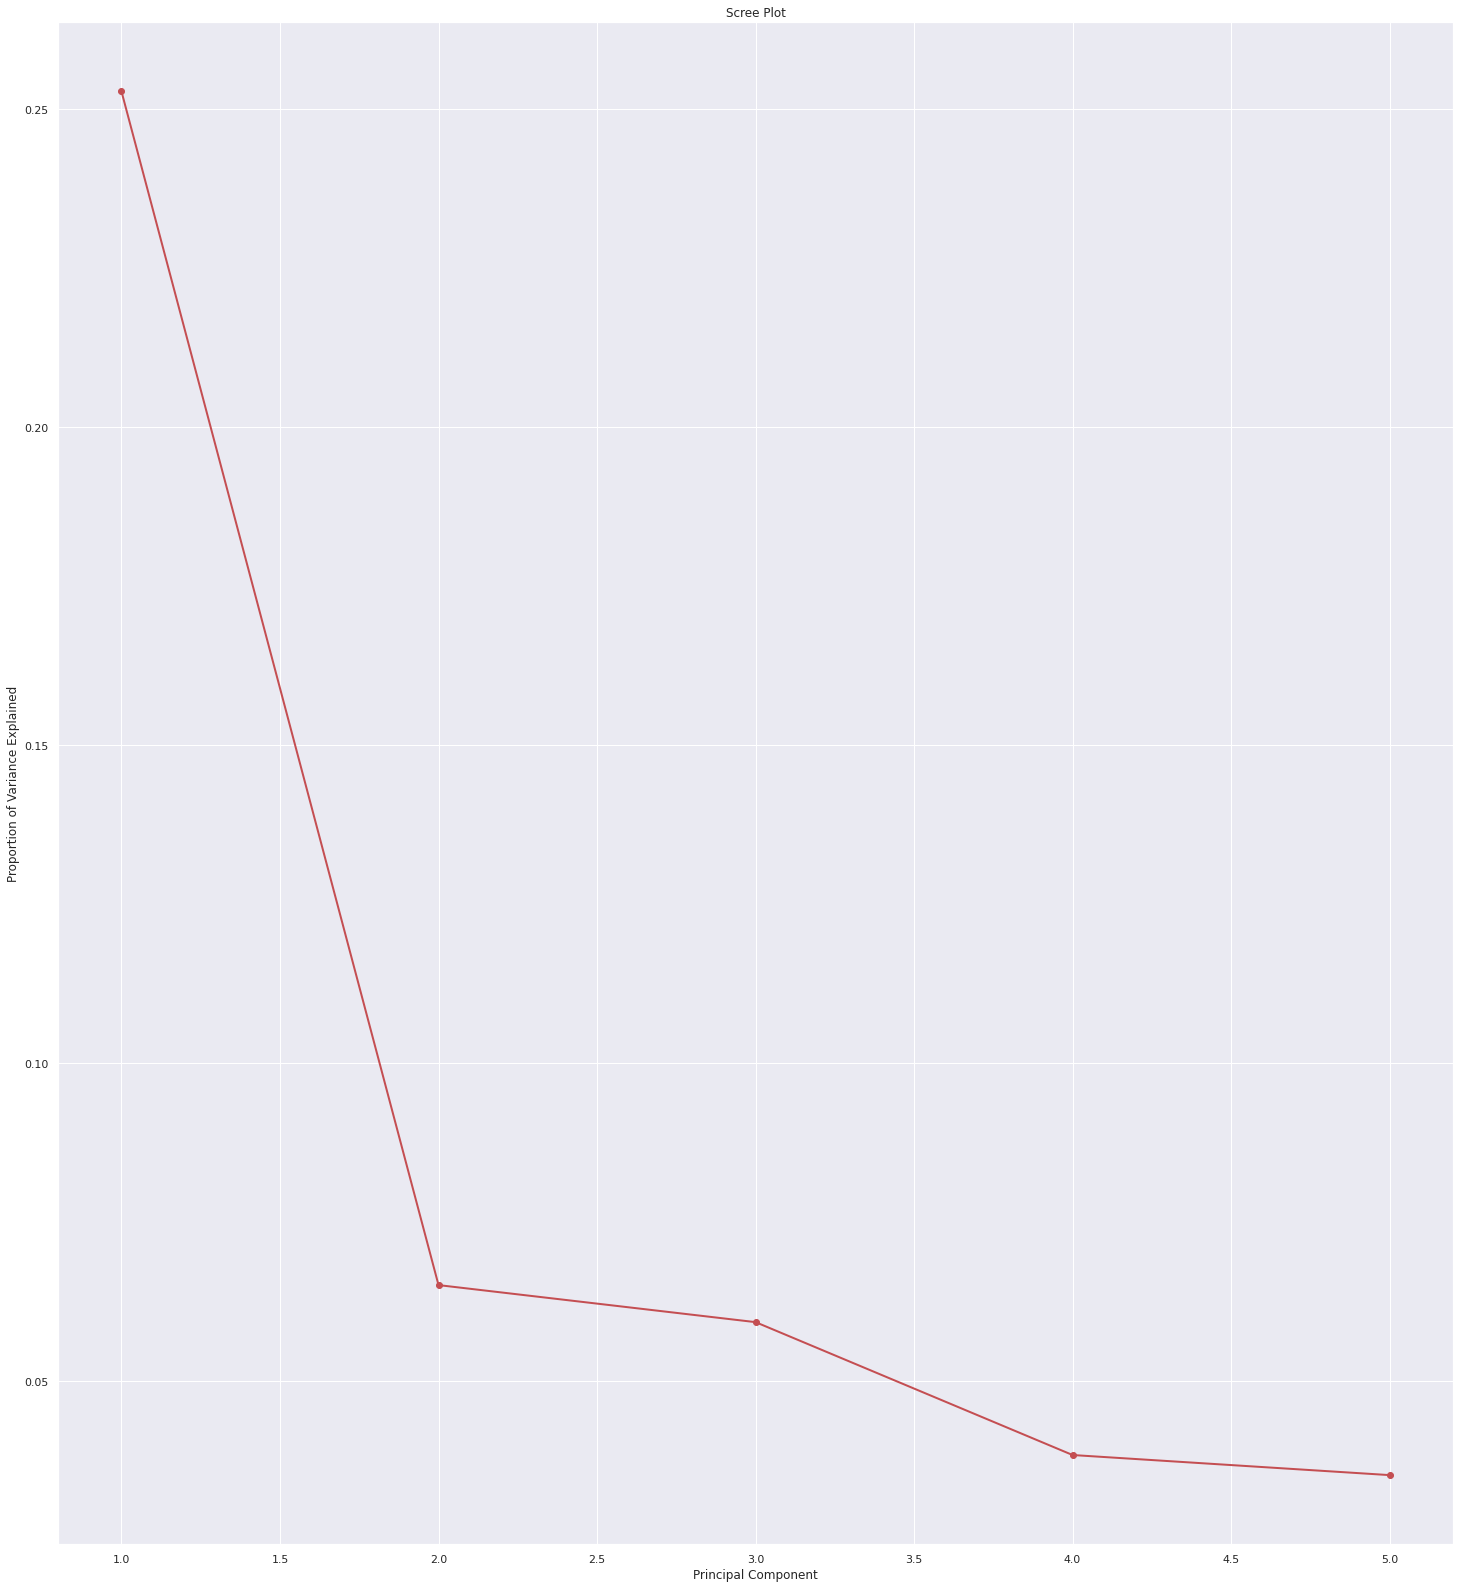

In [204]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [183]:
loadings.shape

(1814, 6)

In [ ]:
loadings = loadings.loc[(loadings!=0).any(1)]
loadings.shape

In [191]:
loadings.head()

,gmd_17Networks_1,zfALFF_17Networks_1,zDCwei_17Networks_1,zReHo_17Networks_1,gmd_17Networks_10,zfALFF_17Networks_10,zDCwei_17Networks_10,zReHo_17Networks_10,gmd_17Networks_11,zfALFF_17Networks_11,...,zDCwei_vCa_R,zReHo_vCa_R,gmd_vmPu_L,zfALFF_vmPu_L,zDCwei_vmPu_L,zReHo_vmPu_L,gmd_vmPu_R,zfALFF_vmPu_R,zDCwei_vmPu_R,zReHo_vmPu_R
0,-1.790633e-18,2.335219e-19,4.517764e-19,-3.166232e-19,1.537908e-19,6.811631e-21,-5.789159e-22,-2.392516e-23,4.581038e-23,-1.005756e-21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-3.354406e-16,-3.437172e-17,7.013818e-17,-5.845886e-17,3.096644e-17,-1.543710e-18,-1.126324e-19,-5.660643e-19,1.573030e-20,-3.546022e-19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.365387e-16,2.278362e-16,6.958310e-17,-4.948639e-17,9.613135e-18,-6.626200e-19,8.009317e-19,2.472555e-19,-1.782412e-19,-5.073076e-20,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,-2.154119e-16,-9.849573e-17,-1.737309e-16,1.235411e-16,-6.246329e-17,7.672875e-18,-4.013377e-18,4.982557e-18,4.518049e-18,4.234486e-18,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,-4.462753e-16,1.226170e-17,-6.052316e-17,-9.345543e-17,7.283182e-17,-5.840903e-17,-2.179401e-19,-1.550184e-17,-3.952077e-19,-3.186014e-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


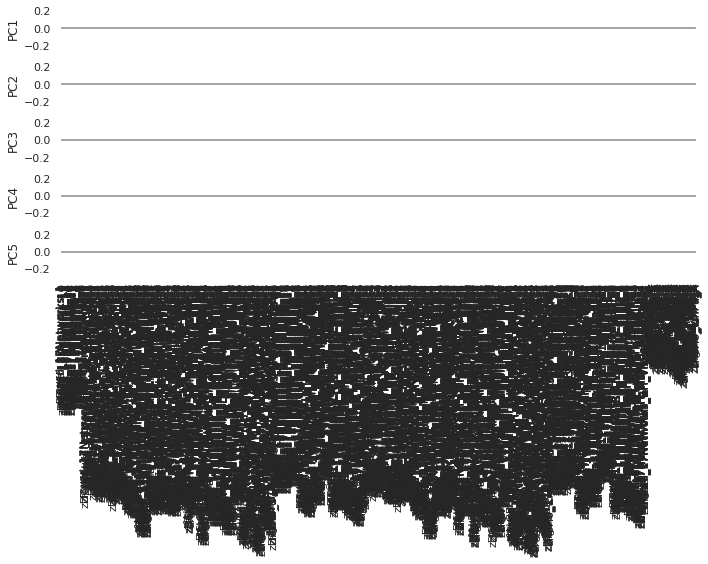

In [209]:
loadings = pd.DataFrame(pca.components_[0:5, :], 
                        columns=features.columns)
loadings = loadings.loc[(loadings!=0).any(1)]
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:5, :])))
f, axes = plt.subplots(5, 1, figsize=(10, 8), sharex=True)
for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)
plt.tight_layout()
plt.show()

In [208]:
loadings.head()

,gmd_17Networks_1,zfALFF_17Networks_1,zDCwei_17Networks_1,zReHo_17Networks_1,gmd_17Networks_10,zfALFF_17Networks_10,zDCwei_17Networks_10,zReHo_17Networks_10,gmd_17Networks_11,zfALFF_17Networks_11,...,zDCwei_vCa_R,zReHo_vCa_R,gmd_vmPu_L,zfALFF_vmPu_L,zDCwei_vmPu_L,zReHo_vmPu_L,gmd_vmPu_R,zfALFF_vmPu_R,zDCwei_vmPu_R,zReHo_vmPu_R
0,2.578713e-20,1.797233e-22,-8.025561e-23,2.198465e-23,1.539058e-24,2.402513e-25,2.913403e-25,9.758063e-25,-3.424227e-25,-1.374471e-25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.031913e-16,9.380307e-19,1.757573e-18,2.386921e-19,8.166177e-20,-5.176065e-21,3.996439e-21,1.029507e-20,-1.438318e-21,-2.223436e-21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.504499e-16,4.257219e-18,-4.251384e-18,8.657044e-20,-4.592999e-19,3.454670e-20,-9.480031e-21,-8.314176e-21,-1.530608e-21,2.703482e-22,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,-8.665929e-17,-1.256829e-16,-5.994834e-17,-9.916026e-17,-3.267651e-17,6.448736e-18,-1.481634e-18,-8.918555e-19,1.089632e-19,1.574402e-19,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,5.008063e-16,3.304513e-17,-1.176981e-16,1.257204e-17,-1.193241e-17,5.263323e-18,-1.226583e-18,-1.376188e-18,-8.126846e-20,5.107069e-19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


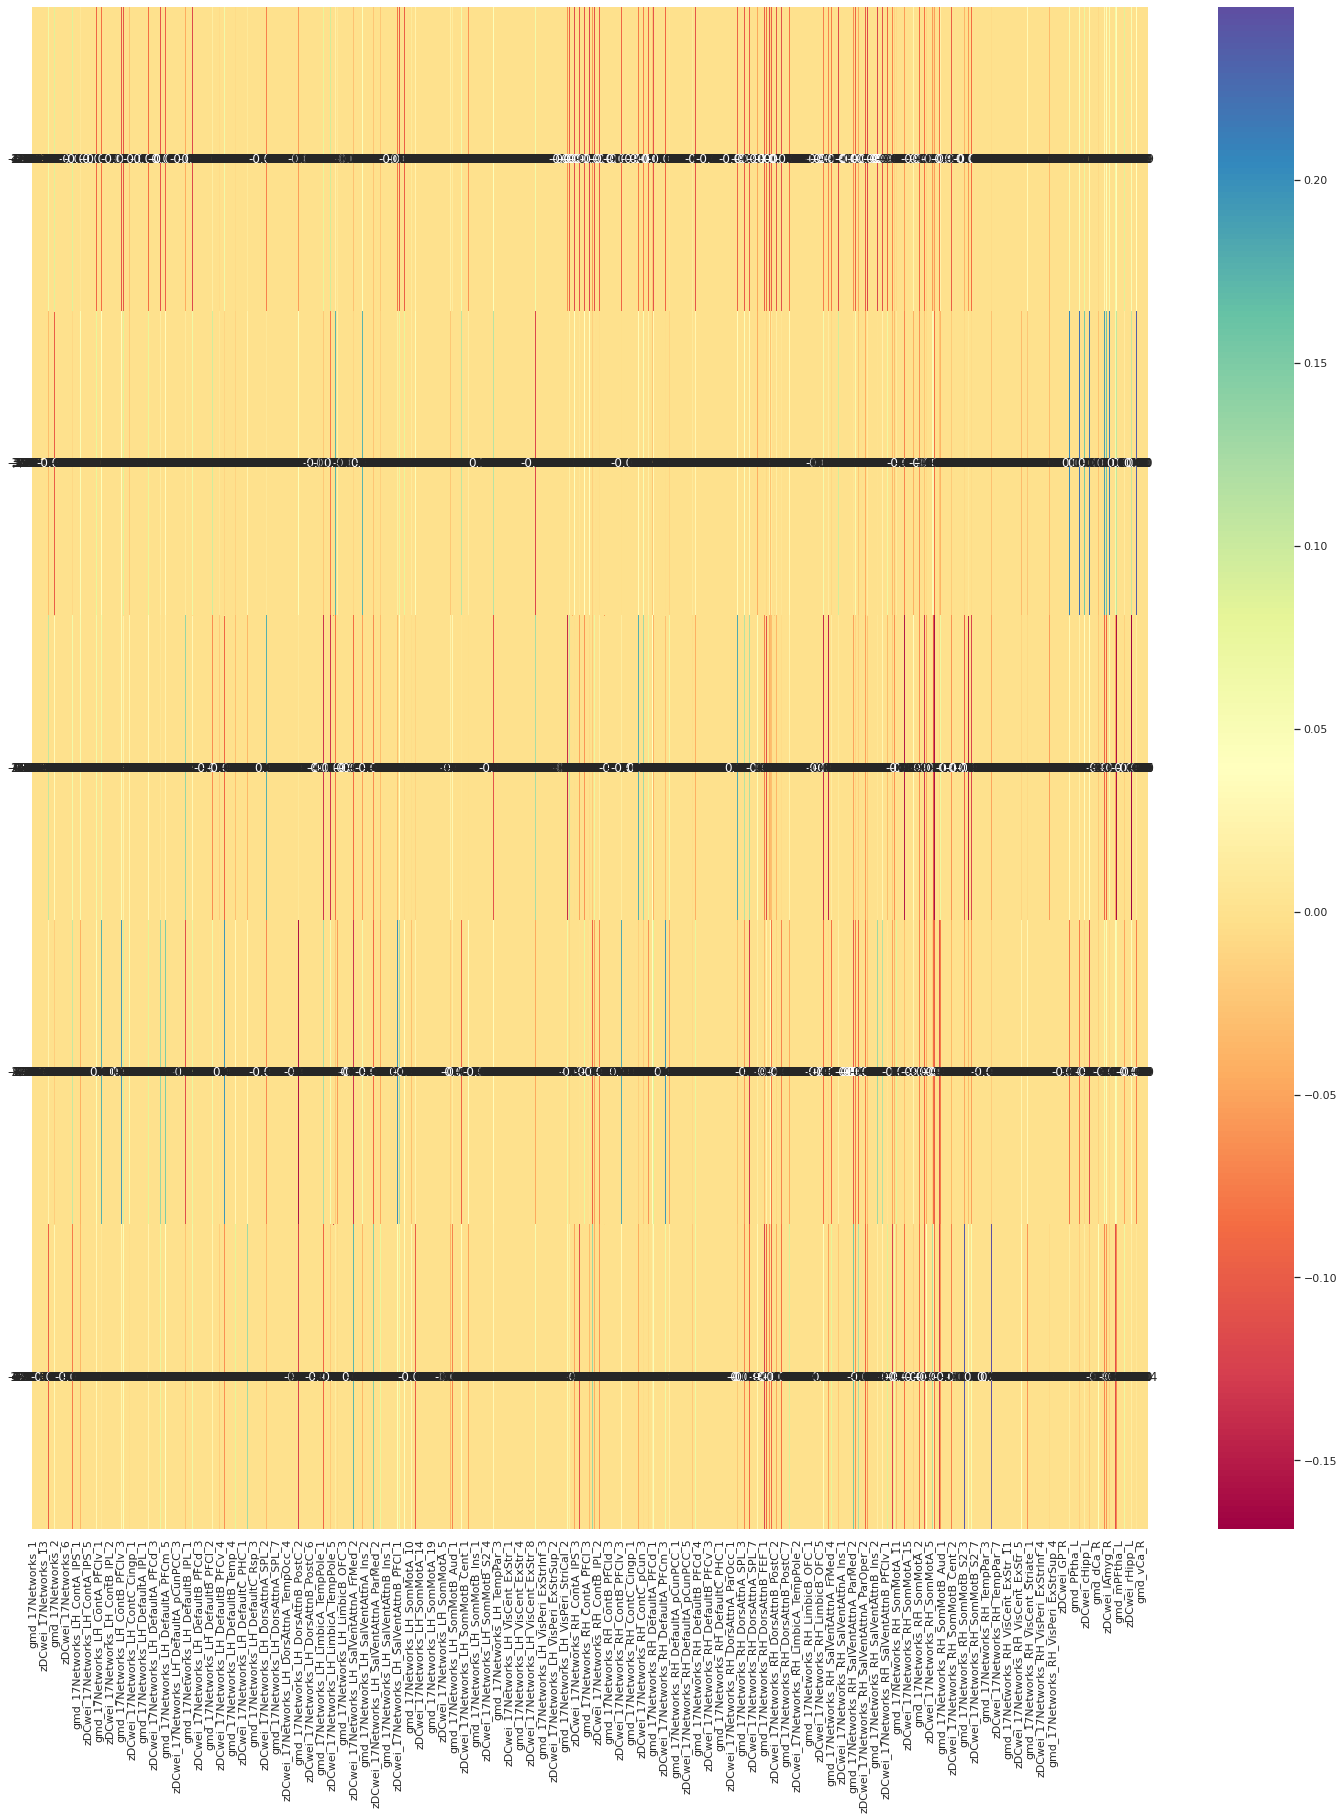

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(25,28)})
ax = sns.heatmap(loadings, annot=True, cmap='Spectral')
plt.show()

In [133]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.25011705 0.06444237 0.05860287 0.03793631 0.03493868 0.03079873
 0.02369296 0.02027067 0.01951459 0.0179235  0.01716751 0.01656427
 0.01529269 0.01405913 0.01385266]
Cumulative Prop. Variance Explained:  [0.25011705 0.31455943 0.3731623  0.4110986  0.44603728 0.47683602
 0.50052897 0.52079964 0.54031423 0.55823773 0.57540525 0.59196951
 0.6072622  0.62132133 0.63517399]


In [134]:
print(pca.explained_variance_)

[46.92282182 12.08961141 10.99410033  7.11698211  6.55461693  5.77794828
  4.44488018  3.8028471   3.66100478  3.36251104  3.2206849   3.1075134
  2.86896061  2.6375409   2.59880705]


In [157]:
features = df.drop(['Subject_ID', 'diagadhd'], axis =1)

In [185]:
features = df.drop(['Subject_ID', 'diagadhd', 'CHILDgender', 'age'], axis =1)

In [197]:
loadings = pd.DataFrame(pca.components_.T, columns=[['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14', 'pc15']], index=features.columns)
#loadings = loadings[['pc1','pc2','pc3','pc4','pc5']]
loadings = loadings[['pc1','pc2','pc3','pc4','pc5','pc6']]
#PC1 = loadings.sort_values("pc1")
loadings.head()
#loadings.sort_values(by=('pc1'))

,pc1,pc2,pc3,pc4,pc5,pc6
gmd_17Networks_1,-1.790633e-18,-3.354406e-16,-1.365387e-16,-2.154119e-16,-4.462753e-16,-5.956764e-16
zfALFF_17Networks_1,2.335219e-19,-3.437172e-17,2.278362e-16,-9.849573e-17,1.226170e-17,1.547606e-16
zDCwei_17Networks_1,4.517764e-19,7.013818e-17,6.958310e-17,-1.737309e-16,-6.052316e-17,-3.002680e-17
zReHo_17Networks_1,-3.166232e-19,-5.845886e-17,-4.948639e-17,1.235411e-16,-9.345543e-17,3.384902e-16
gmd_17Networks_10,1.537908e-19,3.096644e-17,9.613135e-18,-6.246329e-17,7.283182e-17,2.217493e-16


In [198]:
loadings = loadings.loc[(loadings!=0).any(1)]
loadings.shape

(208, 6)

In [205]:
#loadings = pd.DataFrame(pca.components_[0:5, :], 
#                        columns=features.columns)
loadings = pd.DataFrame(pca.components_.T, columns=[['pc1','pc2','pc3','pc4','pc5']], index=features.columns)
loadings = loadings.loc[(loadings!=0).any(1)]
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:5, :])))
f, axes = plt.subplots(5, 1, figsize=(15, 20), sharex=True)
for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)
plt.tight_layout()
plt.show()

TypeError: cannot do slice indexing on Index with these indexers [0] of type int

In [160]:
loadingsnew.to_csv('withoutcovar2.csv')

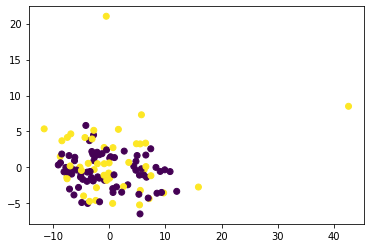

In [110]:
plt.scatter(principalDf["pc1"], principalDf["pc2"], c = df["diagadhd"])